In [ ]:
#java installation
!apt-get update
!apt-get install -y openjdk-21-jdk
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-21-openjdk-amd64/bin/java 1
!update-alternatives --install /usr/bin/javac javac /usr/lib/jvm/java-21-openjdk-amd64/bin/javac 1
!update-alternatives --set java /usr/lib/jvm/java-21-openjdk-amd64/bin/java
!update-alternatives --set javac /usr/lib/jvm/java-21-openjdk-amd64/bin/javac

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,285 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,648 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
# check java version
!java -version

openjdk version "21.0.5" 2024-10-15
OpenJDK Runtime Environment (build 21.0.5+11-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 21.0.5+11-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
# install torch
!pip install torch torchvision torchaudio

In [ ]:
#install Faiss (for vector DB - later on this course)
!pip install faiss-cpu --no-cache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 165.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall openai -y

Found existing installation: openai 1.59.9
Uninstalling openai-1.59.9:
  Successfully uninstalled openai-1.59.9


In [ ]:
# install Pyserini
!pip install pyserini==0.36.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nmslib to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.1/456.1 kB 23.1 MB/s eta 0:00:00
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.0 MB/s eta 0:00:00
  Cre

In [ ]:
from pyserini.search.lucene import LuceneSearcher
from pyserini.index.lucene import IndexReader
from pyserini.analysis import Analyzer, get_lucene_analyzer
from pyserini.search import get_topics, get_topics_with_reader
from pyserini.index.lucene import IndexReader
import subprocess
import itertools
import zipfile
from sentence_transformers import SentenceTransformer
import os
from tqdm import tqdm

import torch.optim as optim
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

from sklearn.metrics import average_precision_score
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
root_folder_path = "/content/drive/MyDrive/TextRetrieval/FinalProject/"

In [ ]:
def unzip_file(folder_path, file_path):
  print(f"unzipping {file_path}")
  zip_file_path = f'{folder_path}/{file_path}.zip'
  extract_to_path = '/content/'

  # Open the zip file and extract all contents
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_to_path)

unzip_file(root_folder_path, "RobustPyserini")
unzip_file(root_folder_path, "raw_files")

unzipping RobustPyserini
unzipping raw_files


# Load indexer and searcher

In [ ]:
index_reader = IndexReader('RobustPyserini')
print(index_reader.stats())

{'total_terms': 251357342, 'documents': 528030, 'non_empty_documents': 528030, 'unique_terms': -1}


In [ ]:
best_fb_term = 17
best_fb_doc = 4
best_original_query_weight = 0.4785
best_k = 0.5644
best_b=0.7565

In [ ]:
searcher = LuceneSearcher('RobustPyserini')

analyzer = get_lucene_analyzer(stemmer='krovetz', stopwords=False) #Ensure no stopwords are removed from the query
searcher.set_analyzer(analyzer)

searcher.set_bm25(k1=best_k, b=best_b)
searcher.set_rm3(fb_terms=best_fb_term, fb_docs=best_fb_doc, original_query_weight=best_original_query_weight)

In [ ]:
total_docs = searcher.num_docs
print(f"Total documents in the index: {total_docs}")

# Retrieve all document IDs
document_idx_to_id = {} # i.e.   0: 'FBIS3-1', 1: 'FBIS3-10004'
document_id_to_idx = {}
for i in range(total_docs):
  doc_id = searcher.doc(i).docid()  # Retrieve document ID
  document_idx_to_id[i] = doc_id
  document_id_to_idx[doc_id] = i

print(f"document_idx_to_id len: {len(document_idx_to_id)}")
print(f"document_id_to_idx len: {len(document_id_to_idx)}")

Total documents in the index: 528030
document_idx_to_id len: 528030
document_id_to_idx len: 528030


In [ ]:
# Load TSV-format topics
queries_file_path = f"{root_folder_path}/queriesROBUST.txt"
raw_queries = get_topics_with_reader('io.anserini.search.topicreader.TsvIntTopicReader', queries_file_path)

labeled_queries = [(key,query) for key, query in raw_queries.items() if key < 351]
labeled_queries = sorted(labeled_queries, key = lambda kvp: kvp[0])
queries = []
for query_id, query_title in labeled_queries:
  queries.append(query_title['title'])
assert len(queries) == 50, 'missing queries'

In [ ]:
unlabeled_queries = [(key,query) for key, query in raw_queries.items() if key >= 351]
unlabeled_queries = sorted(unlabeled_queries, key = lambda kvp: kvp[0])

inference_queries = []
for query_id, query_title in unlabeled_queries:
  inference_queries.append(query_title['title'])

assert len(inference_queries) == 199, 'missing inference queries'

199
199


In [ ]:
# First entry 0 is query id 301
queries[:5]

['international organized crime',
 'poliomyelitis post polio',
 'hubble telescope achievements',
 'endangered species mammals',
 'dangerous vehicles']

In [ ]:
inference_queries[:5]

['falkland petroleum exploration',
 'british chunnel impact',
 'antarctica exploration',
 'journalist risks',
 'ocean remote sensing']

In [ ]:
len(os.listdir("/content/raw_files/"))

528030

# Data Preprocessing

In [ ]:
df = pd.read_csv(f"{root_folder_path}/qrels_50_Queries", sep=" ", names=["query_id", "nothing", "doc_id", "relevance"], usecols=["query_id", "doc_id", "relevance"])

In [ ]:
df["doc_idx"] = df["doc_id"].map(document_id_to_idx)
df["query_idx"] = df["query_id"].map(lambda id: id-301)

In [ ]:
df.head()

,query_id,doc_id,relevance,doc_idx,query_idx
0,301,FBIS3-10082,1,395562,0
1,301,FBIS3-10169,0,131638,0
2,301,FBIS3-10243,1,395600,0
3,301,FBIS3-10319,0,131689,0
4,301,FBIS3-10397,1,395652,0


## Generate triplets

In [ ]:
grouped = df.groupby("query_id")

# Step 2: Generate triplets
triplets = []

for query_id, group in grouped:
  # Separate positive and negative documents
  positives = group[group["relevance"] == 1]["doc_id"].tolist()
  negatives = group[group["relevance"] == 0]["doc_id"].tolist()

  # Create triplets (Anchor, Positive, Negative)
  for pos in positives:
    for neg in negatives:
        triplets.append((query_id, pos, neg))

# Convert triplets to DataFrame
triplets_df = pd.DataFrame(triplets, columns=["query_id", "positive_doc_id", "negative_doc_id"])

In [ ]:
triplets_df["query_idx"] = triplets_df["query_id"].map(lambda id: int(id)-301)
triplets_df["positive_doc_idx"] = triplets_df["positive_doc_id"].map(document_id_to_idx)
triplets_df["negative_doc_idx"] = triplets_df["negative_doc_id"].map(document_id_to_idx)

In [ ]:
triplets_df.head()

,query_id,positive_doc_id,negative_doc_id,query_idx,positive_doc_idx,negative_doc_idx
0,301,FBIS3-10082,FBIS3-10169,0,395562,131638
1,301,FBIS3-10082,FBIS3-10319,0,395562,131689
2,301,FBIS3-10082,FBIS3-10555,0,395562,171
3,301,FBIS3-10082,FBIS3-10634,0,395562,264137
4,301,FBIS3-10082,FBIS3-10635,0,395562,131763


In [ ]:
print(len(triplets_df), len(df))

4669609 61511


In [ ]:
sentence_transformer = SentenceTransformer("all-mpnet-base-v2").to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embedding_dim = 768

In [ ]:
def create_doc_embeddings(embedding_dim: int):
  file_names = os.listdir("/content/raw_files/")
  documents_amount = len(file_names)

  # Initialize the embeddings matrix on the correct device
  document_embeddings = torch.zeros((documents_amount, embedding_dim), device=device)

  print(f"Creating embeddings matrix shaped {document_embeddings.shape}")

  # Use tqdm for a progress bar
  for i, file_name in enumerate(tqdm(file_names, desc="Processing files", unit="file")):
      # Encode the document
      document_embedding = model.encode(f"/content/raw_files/{file_name}", device=device)
      # Convert to tensor and store in embeddings matrix
      document_embeddings[i] = torch.from_numpy(document_embedding).to(device)

  print("Embeddings matrix creation complete.")
  return document_embeddings
#document_embeddings = create_doc_embeddings(embedding_dim)

In [ ]:
def create_query_embeddings(queries, embedding_dim: int):
  embedding_dim = document_embeddings.shape[1]
  query_embeddings = torch.zeros((len(queries), embedding_dim), device=device)

  print(f"Creating embeddings matrix shaped {document_embeddings.shape}")

  for i, query in enumerate(tqdm(queries.values(), desc="Encoding queries")):
      query_embedding = model.encode(query, device=device)
      query_embeddings[i]=torch.from_numpy(query_embedding).to(device)
  return query_embeddings
#query_embeddings = create_query_embeddings(queries, embedding_dim)

In [ ]:
def save_query_embeddings(embeddings):
  save_doc_embeddings_path = "/content/drive/MyDrive/TextRetrieval/FinalProject/query_embeddings.pt"
  torch.save(embeddings.cpu(), save_doc_embeddings_path)
#save_query_embeddings(query_embeddings)

In [ ]:
def save_doc_embeddings(embeddings):
  save_doc_embeddings_path = "/content/drive/MyDrive/TextRetrieval/FinalProject/document_embeddings.pt"
  torch.save(embeddings.cpu(), save_doc_embeddings_path)
#save_doc_embeddings(document_embeddings)

In [ ]:
document_embeddings = torch.load("/content/drive/MyDrive/TextRetrieval/FinalProject/document_embeddings.pt").to(device)
query_embeddings = torch.load("/content/drive/MyDrive/TextRetrieval/FinalProject/query_embeddings.pt").to(device)
document_embeddings.requires_grad_(False)
query_embeddings.requires_grad_(False)
print("doc embedding shape: ", document_embeddings.shape)
print("doc query shape: ", query_embeddings.shape)

<ipython-input-35-99e1cf7e39b5>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  document_embeddings = torch.load("/content/drive/MyDrive/TextRetrieval/FinalProject/document

doc embedding shape:  torch.Size([528030, 768])
doc query shape:  torch.Size([50, 768])


In [ ]:
class TripletDataset(Dataset):
  def __init__(self, triplets_df: pd.DataFrame, query_embeddings: torch.Tensor, document_embeddings: torch.Tensor):
    """
    Args:
        triplets_df (pd.DataFrame): DataFrame with columns ['query_id', 'positive_doc', 'negative_doc'].
        query_embeddings (torch.Tensor): Tensor of query embeddings shaped [50, 768]
        document_embeddings (torch.Tensor): Tensor of document embeddings shaped [528030, 768]
    """
    self.triplets_df = triplets_df
    self.query_embeddings = query_embeddings
    self.document_embeddings = document_embeddings

  def __len__(self):
    return len(self.triplets_df)

  def __getitem__(self, idx):
    row = self.triplets_df.iloc[idx]
    query_idx = row["query_idx"]
    positive_doc_idx = row["positive_doc_idx"]
    negative_doc_idx = row["negative_doc_idx"]

    # Retrieve embeddings
    #query_embedding = torch.tensor(self.query_embeddings[query_idx], dtype=torch.float32)
    #positive_embedding = torch.tensor(self.document_embeddings[positive_doc_idx], dtype=torch.float32)
    #negative_embedding = torch.tensor(self.document_embeddings[negative_doc_idx], dtype=torch.float32)

    query_embedding = self.query_embeddings[query_idx]
    positive_embedding = self.document_embeddings[positive_doc_idx]
    negative_embedding = self.document_embeddings[negative_doc_idx]

    return query_embedding, positive_embedding, negative_embedding

# Instantiate Dataset
dataset = TripletDataset(triplets_df, query_embeddings, document_embeddings)

In [ ]:
# Example usage of dataset

# DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Example Usage
for batch in dataloader:
    query_batch, positive_batch, negative_batch = batch
    print("Query Batch Shape:", query_batch.shape)
    print("Positive Batch Shape:", positive_batch.shape)
    print("Negative Batch Shape:", negative_batch.shape)
    break

Query Batch Shape: torch.Size([128, 768])
Positive Batch Shape: torch.Size([128, 768])
Negative Batch Shape: torch.Size([128, 768])


In [ ]:
class RankSBert(nn.Module):
    """
    Model to perform triplet ranking using PyTorch's built-in TripletMarginLoss.

    Args:
        embedding_dim (int): The dimension of the embeddings (e.g., 768).
        margin (float): Margin between positive and negative samples for triplet loss.
    """
    def __init__(self, embedding_dim=768, margin=1.0):
        super(RankSBert, self).__init__()
        self.embedding_dim = embedding_dim
        self.margin = margin
        self.triplet_loss = nn.TripletMarginLoss(margin=self.margin, p=2)  # p=2 for Euclidean distance
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 32)
        )
    def forward(self, query_embedding, positive_embedding, negative_embedding):
        """
        Forward pass to calculate the triplet loss using the built-in TripletMarginLoss.

        Args:
            query_embedding (torch.Tensor): The embedding of the query, shape [batch_size, embedding_dim].
            positive_embedding (torch.Tensor): The embedding of the positive document, shape [batch_size, embedding_dim].
            negative_embedding (torch.Tensor): The embedding of the negative document, shape [batch_size, embedding_dim].

        Returns:
            triplet_loss (torch.Tensor): The computed triplet loss value.
        """
        query_out = self.fc(query_embedding)
        positive_out = self.fc(positive_embedding)
        negative_out = self.fc(negative_embedding)

        # Apply the TripletMarginLoss directly
        triplet_loss = self.triplet_loss(query_out, positive_out, negative_out)

        return triplet_loss


## Hyperparameters

## Data Loaders

In [ ]:
batch_size=32

In [ ]:
# Split the dataset into training (80%), validation (10%), and testing (10%)
train_size = int(0.9 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each set
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Code to test!

In [ ]:
def get_metric(metric: str, file_name: str, verbose=True):
  # Define the file path
  file_path = f"/content/{file_name}.txt"

  metric_value = None

  # Read the file line by line
  with open(file_path, "r") as file:
      for line in file:
          # Split the line into columns by tab
          columns = line.strip().split("\t")

          if len(columns) >= 3 and metric in columns[0] and columns[1] == "all":
              # Extract the value from the third column
              metric_value = float(columns[2])
              break  # Exit the loop after finding the value

  # Output the metric value
  if verbose:
    if metric_value is not None:
        print(f"The {metric} value is: {metric_value}")
    else:
        print("{metric} value tagged as 'all' not found.")
  return metric_value



In [ ]:
def calculate_map_and_ndcg(dataloader, k=10):
    """
    Calculate MAP and NDCG@k for the validation set.

    Args:
        dataloader (DataLoader): DataLoader for the validation set.
        k (int): Top-k documents to consider for NDCG calculation.

    Returns:
        map_score (float): Mean Average Precision score.
        mean_ndcg (float): Mean NDCG@k score.
    """
    rank_sbert.eval()
    all_true_labels = []
    all_pred_scores = []

    with torch.no_grad():
        for query, positive, negative in tqdm(dataloader, desc="Evaluating", unit="batch"):
            query = query.to(device)
            positive = positive.to(device)
            negative = negative.to(device)

            # Get predicted scores (distance for triplet loss)
            query_out = rank_sbert.fc(query)
            positive_out = rank_sbert.fc(positive)
            negative_out = rank_sbert.fc(negative)

            positive_scores = torch.norm(query_out - positive_out, p=2, dim=1)
            negative_scores = torch.norm(query_out - negative_out, p=2, dim=1)

            # Collect true labels and predicted scores
            all_true_labels.extend([1] * len(positive_scores) + [0] * len(negative_scores))
            all_pred_scores.extend(torch.cat((positive_scores, negative_scores)).cpu().numpy())

    # Calculate MAP
    map_score = average_precision_score(all_true_labels, all_pred_scores)

    # Calculate NDCG
    ndcg_scores = []
    num_samples = len(all_true_labels) // 2  # Positive and negative pairs
    for i in range(num_samples):
        # Get relevance scores and sort by predicted score
        query_relevance = np.array([1] + [0])  # 1 for positive, 0 for negative
        query_scores = np.array(all_pred_scores[i * 2:i * 2 + 2])

        # Sort relevance scores by predicted scores
        ranking = np.argsort(-query_scores)[:k]  # Sort descending and get top-k
        sorted_relevance = query_relevance[ranking]

        # Compute DCG
        dcg = np.sum(sorted_relevance / np.log2(np.arange(2, len(sorted_relevance) + 2)))

        # Compute ideal DCG
        ideal_relevance = np.sort(query_relevance)[::-1][:len(sorted_relevance)]
        ideal_dcg = np.sum(ideal_relevance / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        # Calculate NDCG
        ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0.0
        ndcg_scores.append(ndcg)

    mean_ndcg = np.mean(ndcg_scores)
    return map_score, mean_ndcg


In [ ]:
def train(bert_model, num_epochs=1, k=100):
  # Training loop with MAP & NDCG evaluation and tqdm
  train_losses = []
  val_losses = []
  val_map_scores = []

  steps_per_epoch = len(train_dataloader)  # Total batches per epoch
  validation_interval = steps_per_epoch // 10

  for epoch in range(num_epochs):
      print(f"Epoch {epoch + 1}/{num_epochs}")

      # Training Phase
      rank_sbert.train()
      train_loss = 0.0
      train_loader = tqdm(train_dataloader, desc="Training", unit="batch")
      for batch_count, (query, positive, negative) in enumerate(train_loader):
          query, positive, negative = query.to(device), positive.to(device), negative.to(device)
          optimizer.zero_grad()
          loss = rank_sbert(query, positive, negative)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * query.size(0)
          train_loader.set_postfix({"Batch Loss": loss.item()})

          if batch_count % validation_interval == 0:# and batch_count > 0:
                # Calculate MAP and NDCG during training
                rank_sbert.eval()
                print()
                scores_df = rank_bert(searcher, model_weight, bm25_weight)
                run_and_save_results(output_scores="scores.txt", output_metrics="metrics.txt", verbose=False)
                map_score = get_metric("map", "metrics", verbose=False)
                val_map_scores.append(map_score)
                print(f"Step {batch_count}: MAP = {map_score:.4f}")
                print(f"MAPS:{val_map_scores}")
                rank_sbert.train()

      train_loss /= len(train_dataloader.dataset)
      train_losses.append(train_loss)
      train_loader.close()

      # Validation Phase
      rank_sbert.eval()
      val_loss = 0.0
      val_loader = tqdm(val_dataloader, desc="Validating", unit="batch")
      with torch.no_grad():
          for query, positive, negative in val_loader:
              query, positive, negative = query.to(device), positive.to(device), negative.to(device)
              loss = rank_sbert(query, positive, negative)
              val_loss += loss.item() * query.size(0)
              val_loader.set_postfix({"Batch Loss": loss.item()})

      val_loss /= len(val_dataloader.dataset)
      val_losses.append(val_loss)
      val_loader.close()

      # Print Epoch Summary
      print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

  # Visualization of Losses and Metrics
  plt.figure(figsize=(12, 6))

  # Losses
  plt.subplot(1, 2, 1)
  plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
  plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Train and Validation Loss')
  plt.legend()
  plt.grid()

  # MAP and NDCG
  plt.subplot(1, 2, 2)
  plt.plot(range(1, num_epochs + 1), val_map_scores, label='Validation MAP')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.title('Validation MAP and NDCG@10')
  plt.legend()
  plt.grid()

  plt.tight_layout()
  plt.show()


In [ ]:
def test(rank_sbert):
  # Testing phase (after training)
  rank_sbert.eval()
  total_test_loss = 0.0
  all_true_labels = []
  all_pred_scores = []

  with torch.no_grad():
      for query, positive, negative in tqdm(test_dataloader, desc="Testing", unit="batch"):
          query = query.to(device)
          positive = positive.to(device)
          negative = negative.to(device)

          loss = rank_sbert(query, positive, negative)
          total_test_loss += loss.item()

  avg_test_loss = total_test_loss / len(test_dataloader)
  print(f"Test Loss: {avg_test_loss:.4f}")


In [ ]:
# Hyperparameters
embedding_dim = 768
batch_size = 32
lr = 0.001
num_epochs = 3
margin = 1.0

rank_sbert = RankSBert(embedding_dim=embedding_dim).to(device)
rank_sbert(query_batch, positive_batch, negative_batch)

# Optimizer
optimizer = optim.Adam(rank_sbert.parameters(), lr=lr)

Epoch 1/3


Training:   0%|          | 0/131333 [00:00<?, ?batch/s, Batch Loss=0.999]

Results saved to scores.txt


Training:   0%|          | 16/131333 [00:31<51:13:59,  1.40s/batch, Batch Loss=1.01] 

Step 0: MAP = 0.2232
MAPS:[0.2232]


Training:  10%|▉         | 13123/131333 [01:59<13:42, 143.64batch/s, Batch Loss=0.82]

Results saved to scores.txt


Training:  10%|█         | 13153/131333 [02:30<14:23:05,  2.28batch/s, Batch Loss=0.723]

Step 13133: MAP = 0.2483
MAPS:[0.2232, 0.2483]


Training:  20%|█▉        | 26259/131333 [03:56<11:04, 158.06batch/s, Batch Loss=0.519]

Results saved to scores.txt


Training:  20%|██        | 26291/131333 [04:27<11:42:44,  2.49batch/s, Batch Loss=0.641]

Step 26266: MAP = 0.2619
MAPS:[0.2232, 0.2483, 0.2619]


Training:  30%|██▉       | 39387/131333 [05:50<10:08, 151.07batch/s, Batch Loss=0.897]

Results saved to scores.txt


Training:  30%|███       | 39419/131333 [06:21<10:19:15,  2.47batch/s, Batch Loss=0.677]

Step 39399: MAP = 0.2775
MAPS:[0.2232, 0.2483, 0.2619, 0.2775]


Training:  40%|███▉      | 52532/131333 [07:44<08:12, 159.89batch/s, Batch Loss=0.709]

Results saved to scores.txt


Training:  40%|████      | 52548/131333 [08:15<12:21:52,  1.77batch/s, Batch Loss=0.484]

Step 52532: MAP = 0.2822
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822]


Training:  50%|████▉     | 65662/131333 [09:42<07:15, 150.68batch/s, Batch Loss=0.975]

Results saved to scores.txt


Training:  50%|█████     | 65693/131333 [10:13<7:39:43,  2.38batch/s, Batch Loss=0.776]

Step 65665: MAP = 0.2849
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849]


Training:  60%|█████▉    | 78783/131333 [11:41<05:45, 152.14batch/s, Batch Loss=0.488]

Results saved to scores.txt


Training:  60%|██████    | 78815/131333 [12:12<6:00:42,  2.43batch/s, Batch Loss=0.398]

Step 78798: MAP = 0.3011
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011]


Training:  70%|██████▉   | 91929/131333 [13:40<03:57, 165.62batch/s, Batch Loss=0.719]

Results saved to scores.txt


Training:  70%|███████   | 91946/131333 [14:10<5:51:11,  1.87batch/s, Batch Loss=0.715]

Step 91931: MAP = 0.2993
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993]


Training:  80%|███████▉  | 105064/131333 [15:34<02:52, 151.85batch/s, Batch Loss=0.294]

Results saved to scores.txt


Training:  80%|████████  | 105096/131333 [16:04<2:56:34,  2.48batch/s, Batch Loss=0.613]

Step 105064: MAP = 0.3099
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099]


Training:  90%|████████▉ | 118183/131333 [17:28<01:22, 158.53batch/s, Batch Loss=0.862]

Results saved to scores.txt


Training:  90%|█████████ | 118216/131333 [17:59<1:24:57,  2.57batch/s, Batch Loss=0.35] 

Step 118197: MAP = 0.3067
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067]


Training: 100%|█████████▉| 131328/131333 [19:23<00:00, 154.16batch/s, Batch Loss=0.4]  

Results saved to scores.txt


Training: 100%|█████████▉| 131328/131333 [19:53<00:00, 154.16batch/s, Batch Loss=0.392]

Step 131330: MAP = 0.3158
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158]


Validating: 100%|██████████| 7297/7297 [00:33<00:00, 216.28batch/s, Batch Loss=0.37]


Train Loss: 0.6240, Val Loss: 0.4478
Epoch 2/3


Training:   0%|          | 0/131333 [00:00<?, ?batch/s, Batch Loss=0.454]

Results saved to scores.txt


Training:   0%|          | 18/131333 [00:31<44:49:37,  1.23s/batch, Batch Loss=0.454]

Step 0: MAP = 0.3149
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149]


Training:  10%|▉         | 13122/131333 [01:55<13:04, 150.69batch/s, Batch Loss=0.45] 

Results saved to scores.txt


Training:  10%|█         | 13155/131333 [02:25<12:57:53,  2.53batch/s, Batch Loss=0.623]

Step 13133: MAP = 0.3211
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211]


Training:  20%|█▉        | 26251/131333 [03:49<11:31, 151.99batch/s, Batch Loss=0.403]

Results saved to scores.txt


Training:  20%|██        | 26283/131333 [04:20<11:43:54,  2.49batch/s, Batch Loss=0.361]

Step 26266: MAP = 0.3242
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242]


Training:  30%|██▉       | 39385/131333 [05:44<09:42, 157.84batch/s, Batch Loss=0.284]

Results saved to scores.txt


Training:  30%|███       | 39417/131333 [06:14<10:06:32,  2.53batch/s, Batch Loss=0.179]

Step 39399: MAP = 0.3256
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256]


Training:  40%|███▉      | 52526/131333 [07:42<08:49, 148.77batch/s, Batch Loss=0.454]

Results saved to scores.txt


Training:  40%|████      | 52557/131333 [08:13<9:12:21,  2.38batch/s, Batch Loss=0.185]

Step 52532: MAP = 0.3250
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325]


Training:  50%|████▉     | 65650/131333 [09:40<07:15, 150.68batch/s, Batch Loss=0.312]

Results saved to scores.txt


Training:  50%|█████     | 65679/131333 [10:11<7:55:23,  2.30batch/s, Batch Loss=0.652]

Step 65665: MAP = 0.3309
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309]


Training:  60%|█████▉    | 78793/131333 [11:39<05:53, 148.58batch/s, Batch Loss=0.249]

Results saved to scores.txt


Training:  60%|██████    | 78824/131333 [12:10<6:11:55,  2.35batch/s, Batch Loss=0.374]

Step 78798: MAP = 0.3332
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332]


Training:  70%|██████▉   | 91925/131333 [13:37<04:24, 148.79batch/s, Batch Loss=0.544]

Results saved to scores.txt


Training:  70%|███████   | 91955/131333 [14:08<4:40:16,  2.34batch/s, Batch Loss=0.22] 

Step 91931: MAP = 0.3359
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359]


Training:  80%|███████▉  | 105060/131333 [15:36<02:55, 149.93batch/s, Batch Loss=0.377]

Results saved to scores.txt


Training:  80%|████████  | 105091/131333 [16:07<3:04:17,  2.37batch/s, Batch Loss=0.376]

Step 105064: MAP = 0.3380
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338]


Training:  90%|████████▉ | 118182/131333 [17:37<01:28, 149.08batch/s, Batch Loss=0.353]

Results saved to scores.txt


Training:  90%|█████████ | 118213/131333 [18:08<1:32:28,  2.36batch/s, Batch Loss=0.401]

Step 118197: MAP = 0.3429
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429]


Training: 100%|█████████▉| 131323/131333 [19:36<00:00, 159.61batch/s, Batch Loss=0.198]

Results saved to scores.txt


Training: 100%|█████████▉| 131323/131333 [20:06<00:00, 159.61batch/s, Batch Loss=0.192]

Step 131330: MAP = 0.3392
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392]


Validating: 100%|██████████| 7297/7297 [00:34<00:00, 212.23batch/s, Batch Loss=0.159]


Train Loss: 0.3499, Val Loss: 0.2885
Epoch 3/3


Training:   0%|          | 0/131333 [00:00<?, ?batch/s, Batch Loss=0.248]

Results saved to scores.txt


Training:   0%|          | 17/131333 [00:31<47:50:02,  1.31s/batch, Batch Loss=0.272]

Step 0: MAP = 0.3386
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386]


Training:  10%|▉         | 13130/131333 [01:55<12:29, 157.61batch/s, Batch Loss=0.204]

Results saved to scores.txt


Training:  10%|█         | 13163/131333 [02:26<12:59:44,  2.53batch/s, Batch Loss=0.316]

Step 13133: MAP = 0.3403
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403]


Training:  20%|█▉        | 26258/131333 [03:49<11:56, 146.56batch/s, Batch Loss=0.157]

Results saved to scores.txt


Training:  20%|██        | 26291/131333 [04:20<11:34:59,  2.52batch/s, Batch Loss=0.283]

Step 26266: MAP = 0.3466
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466]


Training:  30%|██▉       | 39385/131333 [05:48<10:35, 144.70batch/s, Batch Loss=0.292]

Results saved to scores.txt


Training:  30%|███       | 39416/131333 [06:19<11:05:53,  2.30batch/s, Batch Loss=0.197] 

Step 39399: MAP = 0.3439
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439]


Training:  40%|███▉      | 52531/131333 [07:49<08:38, 151.98batch/s, Batch Loss=0.229]

Results saved to scores.txt


Training:  40%|████      | 52563/131333 [08:21<9:05:56,  2.40batch/s, Batch Loss=0.34] 

Step 52532: MAP = 0.3486
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486]


Training:  50%|████▉     | 65657/131333 [09:50<07:08, 153.44batch/s, Batch Loss=0.11] 

Results saved to scores.txt


Training:  50%|█████     | 65690/131333 [10:21<7:18:06,  2.50batch/s, Batch Loss=0.124]

Step 65665: MAP = 0.3455
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455]


Training:  60%|█████▉    | 78792/131333 [11:46<05:47, 151.11batch/s, Batch Loss=0.303]

Results saved to scores.txt


Training:  60%|██████    | 78824/131333 [12:16<5:56:15,  2.46batch/s, Batch Loss=0.433]

Step 78798: MAP = 0.3432
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432]


Training:  70%|██████▉   | 91926/131333 [13:41<04:13, 155.37batch/s, Batch Loss=0.171]

Results saved to scores.txt


Training:  70%|███████   | 91958/131333 [14:12<4:27:32,  2.45batch/s, Batch Loss=0.278]

Step 91931: MAP = 0.3451
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451]


Training:  80%|███████▉  | 105053/131333 [15:36<02:44, 159.42batch/s, Batch Loss=0.157]

Results saved to scores.txt


Training:  80%|████████  | 105086/131333 [16:07<2:52:06,  2.54batch/s, Batch Loss=0.187]

Step 105064: MAP = 0.3500
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451, 0.35]


Training:  90%|████████▉ | 118193/131333 [17:32<01:24, 155.71batch/s, Batch Loss=0.297]

Results saved to scores.txt


Training:  90%|█████████ | 118225/131333 [18:03<1:28:19,  2.47batch/s, Batch Loss=0.318]

Step 118197: MAP = 0.3524
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451, 0.35, 0.3524]


Training: 100%|█████████▉| 131325/131333 [19:28<00:00, 155.00batch/s, Batch Loss=0.402] 

Results saved to scores.txt


Training: 100%|█████████▉| 131325/131333 [19:58<00:00, 155.00batch/s, Batch Loss=0.168]

Step 131330: MAP = 0.3498
MAPS:[0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451, 0.35, 0.3524, 0.3498]


Validating: 100%|██████████| 7297/7297 [00:33<00:00, 215.03batch/s, Batch Loss=0]


Train Loss: 0.2375, Val Loss: 0.1968


ValueError: x and y must have same first dimension, but have shapes (3,) and (33,)

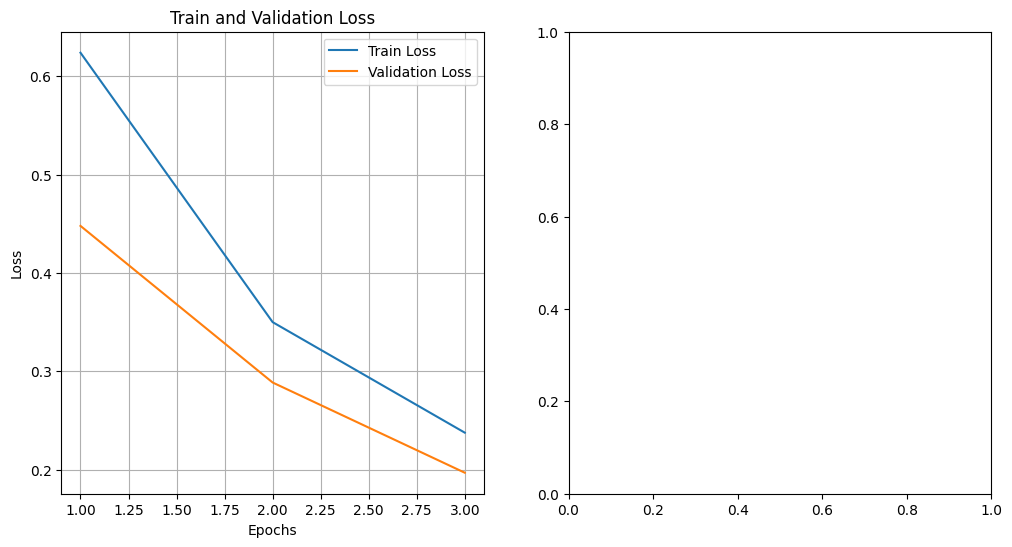

In [ ]:
train(rank_sbert, num_epochs)
test(rank_sbert)

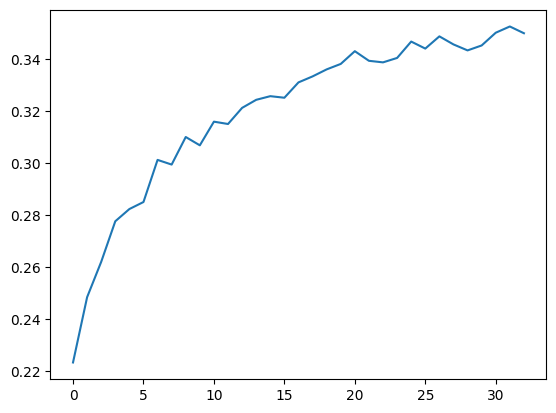

In [ ]:
maps = [0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451, 0.35, 0.3524, 0.3498]

plt.plot(maps)
plt.show()

In [ ]:
map_score, mean_ndcg = calculate_map_and_ndcg(val_dataloader, k=1000)
print(map_score, mean_ndcg)

Evaluating:   0%|          | 0/7297 [00:00<?, ?batch/s]<ipython-input-143-0198bcd206b9>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  query_embedding = torch.tensor(self.query_embeddings[query_idx], dtype=torch.float32)
<ipython-input-143-0198bcd206b9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_embedding = torch.tensor(self.document_embeddings[positive_doc_idx], dtype=torch.float32)
<ipython-input-143-0198bcd206b9>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_embedding = torch.tensor(self.document_embeddi

0.5001119890895022 0.8153352564319207


# Sanity Checks, Relevant > Non-Relevant

###Relevant docs

In [ ]:
query_embedding = torch.tensor(query_embeddings[0]).to(device)
query_rep = rank_sbert.fc(query_embedding)

<ipython-input-226-0d4da7c4e1aa>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  query_embedding = torch.tensor(query_embeddings[0]).to(device)


In [ ]:
positive_examples_doc_idxes = [395562, 395600, 131730]
negative_examples_doc_idxes = [131689, 171]

In [ ]:
for doc_idx in positive_examples_doc_idxes:
  doc_embedding = torch.tensor(document_embeddings[doc_idx]).to(device)
  doc_rep = rank_sbert.fc(doc_embedding)
  similarity = F.cosine_similarity(query_rep, doc_rep, dim=0).item()
  print(f"Positive Similarity = {similarity}")

Positive Similarity = -0.20470556616783142
Positive Similarity = -0.24821799993515015
Positive Similarity = -0.21463651955127716


<ipython-input-228-935dfcb89058>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  doc_embedding = torch.tensor(document_embeddings[doc_idx]).to(device)


In [ ]:
for doc_idx in negative_examples_doc_idxes:
  doc_embedding = torch.tensor(document_embeddings[doc_idx]).to(device)
  doc_rep = rank_sbert.fc(doc_embedding)
  similarity = F.cosine_similarity(query_rep, doc_rep, dim=0).item()
  print(f"Negative Similarity = {similarity}")

Negative Similarity = -0.24135282635688782
Negative Similarity = -0.22017985582351685


<ipython-input-229-90d428c23b41>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  doc_embedding = torch.tensor(document_embeddings[doc_idx]).to(device)


In [ ]:
# Initialize a list to store results
results = []

# Loop over unique query_ids
for query_idx in tqdm(set(df["query_idx"].values)):
    query_rep = rank_sbert.fc(torch.tensor(query_embeddings[query_idx], device=device))  # Get the query embedding

    relevant_similarities = []
    irrelevant_similarities = []

    # For each document, calculate similarity
    for doc_idx, row in df[df["query_idx"] == query_idx].iterrows():
        doc_idx = int(row['doc_idx'])
        doc_rep = rank_sbert.fc(torch.tensor(document_embeddings[doc_idx], device=device))  # Get the document embedding
        similarity = F.cosine_similarity(query_rep, doc_rep, dim=0).item()

        if row['relevance'] == 1:
            relevant_similarities.append(similarity)
        elif row['relevance'] == 0:
            irrelevant_similarities.append(similarity)
        else:
            print("the row", row)

    # Calculate mean and std for relevant and irrelevant documents
    results.append({
        'query_idx': query_idx,
        'avg_relevant_similarity': torch.tensor(relevant_similarities).mean().item() if relevant_similarities else None,
        'std_relevant_similarity': torch.tensor(relevant_similarities).std().item() if relevant_similarities else None,
        'avg_irrelevant_similarity': torch.tensor(irrelevant_similarities).mean().item() if irrelevant_similarities else None,
        'std_irrelevant_similarity': torch.tensor(irrelevant_similarities).std().item() if irrelevant_similarities else None,
    })

# Convert results to a DataFrame
similarity_df = pd.DataFrame(results)


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-230-1e3d1e396c48>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  query_rep = rank_sbert.fc(torch.tensor(query_embeddings[query_idx], device=device))  # Get the query embedding
<ipython-input-230-1e3d1e396c48>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  doc_rep = rank_sbert.fc(torch.tensor(document_embeddings[doc_idx], device=device))  # Get the document embedding
100%|██████████| 50/50 [00:32<00:00,  1.53it/s]


In [ ]:
similarity_df[["query_idx", "avg_relevant_similarity", "avg_irrelevant_similarity"]]

,query_idx,avg_relevant_similarity,avg_irrelevant_similarity
0,0,-0.197525,-0.241049
1,1,0.492714,0.453237
2,2,0.570825,0.522651
3,3,0.486975,0.448086
4,4,0.475474,0.417165
5,5,0.497935,0.455306
6,6,0.569943,0.529991
7,7,0.645777,0.588209
8,8,0.758291,0.701270
9,9,0.700396,0.642336


## Save or load the model

In [ ]:
model_name = "model-3epochs"

In [ ]:
def save_model(model_name):
  model_path = f'{root_folder_path}Models/{model_name}.pth'
  torch.save(rank_sbert.state_dict(), model_path)

save_model(model_name)

In [ ]:
def load_model(model_name, device):
    model = RankSBert()  # Replace with your model class
    model_path = f'{root_folder_path}Models/{model_name}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model



# Load Model

In [ ]:
loaded_model = load_model(model_name, device=device).to(device)
loaded_model

<ipython-input-27-921c1735e7a7>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


RankSBert(
  (triplet_loss): TripletMarginLoss()
  (fc): Sequential(
    (0): Linear(in_features=768, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
  )
)

In [ ]:
query_embeddings = query_embeddings.to(device)
document_embeddings = document_embeddings.to(device)

# Now pass them through the model
model_query_embeddings = loaded_model.fc(query_embeddings)
model_document_embeddings = loaded_model.fc(document_embeddings)

# Print the shapes
print("Embeddings shapes after:")
print("query_embeddings.shape", model_query_embeddings.shape)
print("document_embeddings.shape", model_document_embeddings.shape)


Embeddings shapes after:
query_embeddings.shape torch.Size([50, 32])
document_embeddings.shape torch.Size([528030, 32])


# Use Model - Example

In [ ]:
hits = searcher.search(queries[0], k=1000)

In [ ]:
model_query_embedding = model_query_embeddings[0]

In [ ]:
# Example
for hit in hits[:5]:
  docidx = document_id_to_idx[hit.docid]
  model_doc_embedding = model_document_embeddings[docidx]
  similarity = F.cosine_similarity(model_query_embedding, model_doc_embedding, dim=0).item()
  print(similarity)


-0.2454926073551178
-0.2679635286331177
-0.24539387226104736
-0.26253318786621094
-0.24977202713489532


In [ ]:
#TODO: create query_triplet_embeddings

#Defining Searcher

In [ ]:
def create_inference_query_embeddings(model, inference_queries, embedding_dim: int):
  inference_query_embeddings = torch.zeros((len(inference_queries), embedding_dim), device=device)
  print(f"Creating embeddings matrix shaped {document_embeddings.shape}")

  for i, inference_query in enumerate(tqdm(inference_queries, desc="Encoding queries")):
      inference_query_embedding = model.encode(inference_query, device=device)
      inference_query_embeddings[i]=torch.from_numpy(inference_query_embedding).to(device)
  return inference_query_embeddings

inference_query_embeddings = create_inference_query_embeddings(sentence_transformer, inference_queries, embedding_dim)

Creating embeddings matrix shaped torch.Size([528030, 768])


Encoding queries: 100%|██████████| 199/199 [00:07<00:00, 26.98it/s]


In [ ]:
def save_inference_query_embeddings(inference_embeddings):
  save_queries_embeddings_path = "/content/drive/MyDrive/TextRetrieval/FinalProject/inference_query_embeddings.pt"
  torch.save(inference_embeddings.cpu(), save_queries_embeddings_path)
save_inference_query_embeddings(inference_query_embeddings)

In [ ]:
inference_query_embeddings = torch.load("/content/drive/MyDrive/TextRetrieval/FinalProject/inference_query_embeddings.pt").to(device)
print("inference_query_embeddings shape: ", inference_query_embeddings.shape)

inference_query_embeddings shape:  torch.Size([199, 768])


<ipython-input-70-b68a7af5b8c5>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  inference_query_embeddings = torch.load("/content/drive/MyDrive/TextRetrieval/FinalProject/i

In [ ]:
columns = ['query_id', 'nothing', 'doc-id', 'rank', 'similarity', 'pyserini']

# Trec Eval

In [ ]:
def rank_bert(rank_sbert, queries, query_embeddings, searcher, model_weight, bm25_weight, retrieve_doc_count=1000, verbose=True):
    run_name = "run3"
    results = []
    columns = ['query_id', 'nothing', 'doc-id', 'rank', 'similarity', 'pyserini']
    print("queries length:", len(queries))
    for query_idx, query in enumerate(queries):
        hits = searcher.search(query, k=retrieve_doc_count)
        query_id = query_idx + 301 if len(queries) == 50 else query_idx + 351
        if query_id > 450:
          query_id += 150
        if query_id >= 672:
          query_id += 1

        query_embedding = rank_sbert.fc(query_embeddings[query_idx])
        # Collect BM25 scores and similarities
        bm25_scores = [hit.score for hit in hits]
        similarities = []
        for hit in hits:
            docidx = document_id_to_idx[hit.docid]
            doc_embedding = rank_sbert.fc(document_embeddings[docidx])  # Ensure doc_embedding is a tensor
            similarity = F.cosine_similarity(query_embedding, doc_embedding, dim=0).item()
            similarities.append(similarity)

        # Normalize BM25 scores using z-score normalization
        bm25_mean = sum(bm25_scores) / len(bm25_scores)
        bm25_std = (sum((x - bm25_mean) ** 2 for x in bm25_scores) / len(bm25_scores)) ** 0.5
        norm_bm25_scores = [(x - bm25_mean) / bm25_std if bm25_std > 0 else 0 for x in bm25_scores]

        # Normalize similarities using z-score normalization
        sim_mean = sum(similarities) / len(similarities)
        sim_std = (sum((x - sim_mean) ** 2 for x in similarities) / len(similarities)) ** 0.5
        norm_similarities = [(x - sim_mean) / sim_std if sim_std > 0 else 0 for x in similarities]

        # Combine normalized scores and append to results
        for rank, hit in enumerate(hits):
            combined_similarity = (bm25_weight * norm_bm25_scores[rank] + model_weight * norm_similarities[rank])
            results.append({
                'query_id': query_id,
                'nothing': "Q0",  # 'nothing' column should be "Q0"
                'doc-id': hit.docid,
                'rank': "nothing-yet",
                'similarity': combined_similarity,
                'pyserini': run_name
            })

    # Create a DataFrame from the list of results
    scores_df = pd.DataFrame(results, columns=columns)
    scores_df.sort_values(by=['query_id', 'similarity'], ascending=[True, False], inplace=True)
    scores_df['rank'] = scores_df.groupby('query_id').cumcount() + 1

    # Save to file in the required format (run3.res)
    output_file = "scores.txt"
    scores_df.to_csv(output_file, sep=' ', index=False, header=False)
    if verbose:
        print(f"Results saved to {output_file}")
    return scores_df

In [ ]:
def run_and_save_results(output_scores="scores.txt", output_metrics = "metrics.txt", verbose=True):
    if verbose:
      print(f"Evaluating on file {output_scores}")
    command = [
        "python", "-m", "pyserini.eval.trec_eval", "-q",
        root_folder_path + "qrels_50_Queries",
        output_scores
    ]

    with open(output_metrics, "w") as f:
        subprocess.run(command, stdout=f)

In [ ]:
model_weight = 0.65
bm25_weight = 1 - model_weight

In [ ]:
inference_queries[0]

'falkland petroleum exploration'

In [ ]:
scores_df = rank_bert(loaded_model, inference_queries, inference_query_embeddings, searcher, model_weight, bm25_weight)

queries length: 199
Results saved to scores.txt


In [ ]:
print("query ids:")
print(scores_df["query_id"].min())
print(scores_df["query_id"].max())
print(scores_df["query_id"].nunique())
print()
print("ranks:")
print(scores_df["rank"].min())
print(scores_df["rank"].max())
print(scores_df["rank"].nunique())


query ids:
351
700
199

ranks:
1
1000
1000


In [ ]:
scores_df.groupby("query_id").count()

,nothing,doc-id,rank,similarity,pyserini
query_id,,,,,
351,1000,1000,1000,1000,1000
352,1000,1000,1000,1000,1000
353,1000,1000,1000,1000,1000
354,1000,1000,1000,1000,1000
355,1000,1000,1000,1000,1000
...,...,...,...,...,...
696,1000,1000,1000,1000,1000
697,1000,1000,1000,1000,1000
698,1000,1000,1000,1000,1000


In [ ]:
scores_df

,query_id,nothing,doc-id,rank,similarity,pyserini
3,351,Q0,FT921-6603,1,2.320903,run3
686,351,Q0,FT924-10495,2,2.280108,run3
1,351,Q0,FT934-4848,3,2.245317,run3
0,351,Q0,FT922-15099,4,2.130232,run3
5,351,Q0,FBIS3-59016,5,2.048504,run3
...,...,...,...,...,...,...
198187,700,Q0,FR940627-0-00130,996,-2.050760,run3
198808,700,Q0,LA072589-0153,997,-2.428877,run3
198780,700,Q0,FBIS4-7950,998,-2.479760,run3
198509,700,Q0,LA120389-0186,999,-2.598116,run3


In [ ]:
scores_df = rank_bert(rank_sbert, queries, query_embeddings ,searcher, model_weight, bm25_weight)
run_and_save_results()

queries length: 50
Results saved to scores.txt
Evaluating on file scores.txt


In [ ]:
scores_df[scores_df["query_id"]==301]

,query_id,nothing,doc-id,rank,similarity,pyserini
65,301,Q0,FBIS4-26815,66,4.481103,run3
62,301,Q0,FBIS4-64135,63,4.125614,run3
144,301,Q0,LA061090-0001,145,4.015971,run3
2,301,Q0,FBIS4-41991,3,4.003122,run3
7,301,Q0,FBIS3-19646,8,3.996306,run3
...,...,...,...,...,...,...
774,301,Q0,FBIS3-49407,775,-2.920749,run3
891,301,Q0,LA060790-0068,892,-2.945691,run3
711,301,Q0,FBIS4-26127,712,-2.967641,run3
943,301,Q0,FBIS3-16455,944,-3.165005,run3


In [ ]:
def rank_bm25(searcher, retrieve_doc_count=1000, verbose=True):
  run_name = "run3"
  results = []

  for query_idx, query in enumerate(queries):
    hits = searcher.search(query, k=retrieve_doc_count)
    query_id = query_idx + 301
    for rank, hit in enumerate(hits):
      results.append({
              'query_id': query_id,
              'nothing': "Q0",  # 'nothing' column should be "Q0"
              'doc-id': hit.docid,
              'rank': rank + 1,
              'similarity': hit.score,
              'pyserini': run_name
          })

  # Create a DataFrame from the list of results
  scores_df = pd.DataFrame(results, columns=columns)

  # Save to file in the required format (run2.res)
  output_file = "scores.txt"
  scores_df.to_csv(output_file, sep=' ', index=False, header=False)
  if verbose:
    print(f"Results saved to {output_file}")

In [ ]:
rank_bm25(searcher)
run_and_save_results()

Results saved to scores.txt
Evaluating on file scores.txt


In [ ]:
# Initialize columns
columns = ['query_idx', 'nothing', 'doc-id', 'rank', 'similarity', 'pyserini']

# Create a list to store the rows (dictionaries)
results = []

# Assuming `top_k_indices_per_query`, `all_similarities`, and `document_idx_to_id` are already defined
run_name = "pyserini"  # or "run1" or "run3" depending on the specific run you are generating results for

# Loop through queries and top-k results
for i in range(top_k_indices_per_query.shape[0]):  # for each query
    for j in range(top_k_indices_per_query.shape[1]):  # for each document
        doc_idx = top_k_indices_per_query[i, j].item()  # document index
        doc_id = document_idx_to_id[doc_idx]  # document id (from mapping)
        similarity = all_similarities[i, doc_idx].item()  # similarity score
        rank = j + 1  # rank (1-based, so add 1 to zero-based index)

        # Append the result as a dictionary to the list
        results.append({
            'query_idx': 301 + i,
            'nothing': "Q0",  # 'nothing' column should be "Q0"
            'doc-id': doc_id,
            'rank': rank,
            'similarity': f"{similarity:.4f}",  # Format similarity to 4 decimal places
            'pyserini': run_name
        })

# Create a DataFrame from the list of results
scores_df = pd.DataFrame(results, columns=columns)

# Save to file in the required format (run2.res)
output_file = "scores.txt"
scores_df.to_csv(output_file, sep=' ', index=False, header=False)

print(f"Results saved to {output_file}")


Results saved to scores.txt


# Max's code for raw text retrieval

In [ ]:
from pyserini.index.lucene import IndexReader
from tqdm import tqdm
from pyserini.search.lucene import LuceneSearcher
import os

# Initialize the searcher
searcher = LuceneSearcher("RobustPyserini")  # Replace "RobustPyserini" with your index directory

# Get total number of documents in the index
total_docs = searcher.num_docs
print(f"Total documents in the index: {total_docs}")

# Retrieve all document IDs
document_ids = []
for i in range(total_docs):
    doc_id = searcher.doc(i).docid()  # Retrieve document ID
    if doc_id:  # Ensure the document ID is valid
        document_ids.append(doc_id)
    else:
      print(f"doc id {doc_id} isn't valid")

print(f"len: {len(document_ids)}")


index_reader = IndexReader.from_prebuilt_index('robust04')

save_path = "raw_files2"
os.makedirs(save_path, exist_ok=True)

for doc_id in tqdm(document_ids):
    with open(f"{save_path}/{doc_id}.txt", "w") as file:
        file.write(index_reader.doc(doc_id).raw())


len(os.listdir("raw_files2"))

#######################

#############################

# Attempt 2 - Retrieval and Reranking

In [ ]:
searcher = LuceneSearcher('RobustPyserini')
# specify custom analyzer for the query processing step to match the way the index was built
analyzer = get_lucene_analyzer(stemmer='krovetz', stopwords=False) #Ensure no stopwords are removed from the query
searcher.set_bm25(k1=0.7, b=0.5)
searcher.set_analyzer(analyzer)

In [ ]:
searcher.set_rm3() # Query expansion

In [ ]:
min(queries.keys())

301

In [ ]:
queries

['international organized crime',
 'poliomyelitis post polio',
 'hubble telescope achievements',
 'endangered species mammals',
 'dangerous vehicles',
 'african civilian deaths',
 'new hydroelectric projects',
 'implant dentistry',
 'rap crime',
 'radio waves brain cancer',
 'industrial espionage',
 'hydroponics',
 'magnetic levitation maglev',
 'marine vegetation',
 'unexplained highway accidents',
 'polygamy polyandry polygyny',
 'unsolicited faxes',
 'best retirement country',
 'new fuel sources',
 'undersea fiber optic cable',
 'women parliaments',
 'international art crime',
 'literary journalistic plagiarism',
 'argentine british relations',
 'cult lifestyles',
 'ferry sinkings',
 'modern slavery',
 'pope beatifications',
 'mexican air pollution',
 'iran iraq cooperation',
 'world bank criticism',
 'income tax evasion',
 'antibiotics bacteria disease',
 'export controls cryptography',
 'adoptive biological parents',
 'black bear attacks',
 'viral hepatitis',
 'risk aspirin',
 'al

In [ ]:
columns = ['query_id', 'nothing', 'doc-id', 'rank', 'similarity', 'pyserini']

In [ ]:
columns

['query_id', 'nothing', 'doc-id', 'rank', 'similarity', 'pyserini']

In [ ]:
run_name = "run3"
results = []

for query_idx, query in enumerate(queries):
  hits = searcher.search(query, k=1000)
  query_id = query_idx + 301
  for rank, hit in enumerate(hits):
    results.append({
            'query_id': query_id,
            'nothing': "Q0",  # 'nothing' column should be "Q0"
            'doc-id': hit.docid,
            'rank': rank + 1,
            'similarity': hit.score,
            'pyserini': run_name
        })

# Create a DataFrame from the list of results
scores_df = pd.DataFrame(results, columns=columns)

# Save to file in the required format (run2.res)
output_file = "scores.txt"
scores_df.to_csv(output_file, sep=' ', index=False, header=False)

print(f"Results saved to {output_file}")

Results saved to scores.txt


In [ ]:
run_and_save_results()

Evaluating on file scores.txt


In [ ]:
scores_df

,query_id,nothing,doc-id,rank,similarity,pyserini
0,301,Q0,FBIS4-41991,1,8.281400,run3
1,301,Q0,FBIS4-38364,2,7.986100,run3
2,301,Q0,FBIS3-19646,3,7.941900,run3
3,301,Q0,FBIS3-21961,4,7.941899,run3
4,301,Q0,FBIS4-19535,5,7.933500,run3
...,...,...,...,...,...,...
45717,350,Q0,LA112289-0118,996,4.232999,run3
45718,350,Q0,FR940930-2-00175,997,4.230200,run3
45719,350,Q0,FBIS3-35841,998,4.230099,run3
45720,350,Q0,FT944-12817,999,4.230098,run3


In [ ]:
print(index_reader.stats())


{'total_terms': 251357342, 'documents': 528030, 'non_empty_documents': 528030, 'unique_terms': -1}


In [ ]:
# Re-rank the documents based on cosine similarity
query_hits = []
reranked_hits = []

for query_idx, query in enumerate(queries):
    hits = searcher.search(query, k=1000)
    query_embedding = query_embeddings[query_idx]

    # Compute similarity scores between query and documents
    scores = []
    for hit in hits:
        doc_idx = document_id_to_idx[hit.docid]  # map docid to index
        doc_embedding = document_embeddings[doc_idx]  # retrieve document embedding

        # Calculate cosine similarity between query and document embeddings
        similarity = cosine_similarity([query_embedding], [doc_embedding])[0][0]
        scores.append((hit, similarity))  # store hit and its similarity score

    # Sort the documents based on the similarity score (descending order)
    reranked_hits = sorted(scores, key=lambda x: x[1], reverse=True)
    #print([(hit[0].docid, hit[1]) for hit in reranked_hits])
    query_hits.append(reranked_hits)
    # Now reranked_hits contains the hits sorted by similarity score
    # for rank, (hit, similarity) in enumerate(reranked_hits[:10]):  # Top-10 reranked docs
    #    print(f"Rank: {rank + 1}, DocID: {hit.docid}, Score: {hit.score}, Similarity: {similarity}")

In [ ]:
run_name = "run3"
results = []

for query_idx, hits in enumerate(query_hits):
  for rank, (hit, similarity) in enumerate(hits):
    results.append({
            'query_id': query_idx + 301,
            'nothing': "Q0",  # 'nothing' column should be "Q0"
            'doc-id': hit.docid,
            'rank': rank+1,
            'similarity': similarity,
            'pyserini': run_name
        })

# Create a DataFrame from the list of results
reranked_scores_df = pd.DataFrame(results, columns=columns)

# Save to file in the required format (run2.res)
output_file = "reranked-scores.txt"
reranked_scores_df.to_csv(output_file, sep=' ', index=False, header=False)

print(f"Results saved to {output_file}")

Results saved to reranked-scores.txt


In [ ]:
run_and_save_results(output_scores="reranked-scores.txt", output_metrics="reranked-metrics.txt")

Evaluating on file reranked-scores.txt
['python', '-m', 'pyserini.eval.trec_eval', '-q', '/content/drive/MyDrive/TextRetrieval/FinalProject/qrels_50_Queries', 'reranked-scores.txt']


In [ ]:
scores_df[scores_df["query_id"]==301].head()

,query_id,nothing,doc-id,rank,similarity,pyserini
0,301,Q0,FBIS4-41991,1,8.281400,run3
1,301,Q0,FBIS4-38364,2,7.986100,run3
2,301,Q0,FBIS3-19646,3,7.941900,run3
3,301,Q0,FBIS3-21961,4,7.941899,run3
4,301,Q0,FBIS4-19535,5,7.933500,run3


In [ ]:
reranked_scores_df[scores_df["query_id"]==301].head()

<ipython-input-47-5136ecd2d022>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reranked_scores_df[scores_df["query_id"]==301].head()


,query_id,nothing,doc-id,rank,similarity,pyserini
0,301,Q0,FBIS3-1849,1,0.100349,run3
1,301,Q0,FBIS3-61171,2,0.091439,run3
2,301,Q0,LA010990-0108,3,0.091138,run3
3,301,Q0,FR941107-1-00027,4,0.087232,run3
4,301,Q0,FBIS4-45346,5,0.085739,run3


In [ ]:
reranked_scores_df[scores_df["query_id"]==301].values[0]

array([301, 'Q0', 'FBIS3-1849', 579, 1.5709999799728394, 'run3'],
      dtype=object)

In [ ]:
reranked_query301_docs = set(reranked_scores_df[reranked_scores_df["query_id"]==301]["doc-id"].values)

In [ ]:
query301_docs = set(scores_df[scores_df["query_id"]==301]["doc-id"].values)

In [ ]:
len(query301_docs.intersection(reranked_query301_docs))

1000

In [ ]:
scores_df

,query_id,nothing,doc-id,rank,similarity,pyserini
0,301,Q0,FBIS4-41991,1,2.816000,run3
1,301,Q0,FBIS4-38364,2,2.754500,run3
2,301,Q0,FBIS3-19646,3,2.620000,run3
3,301,Q0,FBIS3-21961,4,2.619999,run3
4,301,Q0,FBIS4-43965,5,2.590000,run3
...,...,...,...,...,...,...
49995,350,Q0,FT941-10054,996,1.091197,run3
49996,350,Q0,LA100989-0080,997,1.091196,run3
49997,350,Q0,FT932-6839,998,1.090900,run3
49998,350,Q0,FR940525-1-00060,999,1.090799,run3


In [ ]:
reranked_scores_df

,query_id,nothing,doc-id,rank,similarity,pyserini
0,301,Q0,FBIS3-1849,579,1.571000,run3
1,301,Q0,FBIS3-61171,643,1.541100,run3
2,301,Q0,LA010990-0108,779,1.475600,run3
3,301,Q0,FR941107-1-00027,362,1.737300,run3
4,301,Q0,FBIS4-45346,302,1.786400,run3
...,...,...,...,...,...,...
49995,350,Q0,FT941-15800,54,1.692600,run3
49996,350,Q0,FT934-5579,15,1.885100,run3
49997,350,Q0,FT931-6598,814,1.145292,run3
49998,350,Q0,FR940524-2-00057,891,1.120189,run3


In [ ]:
# 2. Calculate Cosine Similarities for Each Query with All Documents
all_similarities = []

for query_embedding in tqdm(query_embeddings, desc="Calculating similarities"):
    # Compute cosine similarity for this query with all document embeddings
    cosine_similarities = F.cosine_similarity(query_embedding.unsqueeze(0), document_embeddings)
    all_similarities.append(cosine_similarities)

# 3. Process or Store the Results
all_similarities = torch.stack(all_similarities)  # Shape: [num_queries, num_documents]

# Optional: For each query, get top-k most similar documents
top_k = 1000
top_k_indices_per_query = all_similarities.topk(top_k, dim=1).indices

# Print top-k results for each query
'''for q_idx, top_k_indices in enumerate(top_k_indices_per_query):
    print(f"Query {q_idx}:")
    for idx in top_k_indices:
        print(f"  Document {idx.item()} with similarity {all_similarities[q_idx, idx].item()}")'''


Calculating similarities: 100%|██████████| 50/50 [00:00<00:00, 1497.73it/s]


'for q_idx, top_k_indices in enumerate(top_k_indices_per_query):\n    print(f"Query {q_idx}:")\n    for idx in top_k_indices:\n        print(f"  Document {idx.item()} with similarity {all_similarities[q_idx, idx].item()}")'

In [ ]:
top_k_indices_per_query.shape

torch.Size([50, 1000])

In [ ]:
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    total_train_loss = 0.0

    # Training phase with tqdm for progress bar
    with tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} Training - Loss: 0.0000", unit="batch") as pbar:
        for batch_idx, (query, positive, negative) in enumerate(pbar):
            query = query.to(device)
            positive = positive.to(device)
            negative = negative.to(device)

            optimizer.zero_grad()

            # Forward pass: calculate the triplet loss
            loss = model(query, positive, negative)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

            # Update progress bar with running loss
            avg_loss = total_train_loss / (batch_idx + 1)
            pbar.set_description(f"Epoch {epoch+1}/{num_epochs} Training - Loss: {avg_loss:.4f}")  # Update tqdm description with running loss

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Validation phase with tqdm for progress bar
    avg_val_loss = 0.0

    with torch.no_grad():
        for query, positive, negative in tqdm(val_dataloader, desc="Validation", unit="batch"):
            query = query.to(device)
            positive = positive.to(device)
            negative = negative.to(device)

            loss = model(query, positive, negative)
            avg_val_loss += loss.item()

    avg_val_loss /= len(val_dataloader)
    val_losses.append(avg_val_loss)
    #print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, MAP: {val_map:.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")


Epoch 1/2 Training - Loss: 0.0000:   0%|          | 0/131333 [00:00<?, ?batch/s]<ipython-input-49-0198bcd206b9>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  query_embedding = torch.tensor(self.query_embeddings[query_idx], dtype=torch.float32)
<ipython-input-49-0198bcd206b9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_embedding = torch.tensor(self.document_embeddings[positive_doc_idx], dtype=torch.float32)
<ipython-input-49-0198bcd206b9>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_embedding = torch.tensor

Epoch 1/2, Train Loss: 0.6213


Validation: 100%|██████████| 7297/7297 [00:46<00:00, 155.72batch/s]


Epoch 1/2, Validation Loss: 0.4243


Epoch 2/2 Training - Loss: 0.3331: 100%|██████████| 131333/131333 [22:29<00:00, 97.30batch/s]


Epoch 2/2, Train Loss: 0.3331


Validation: 100%|██████████| 7297/7297 [00:46<00:00, 156.56batch/s]

Epoch 2/2, Validation Loss: 0.2624


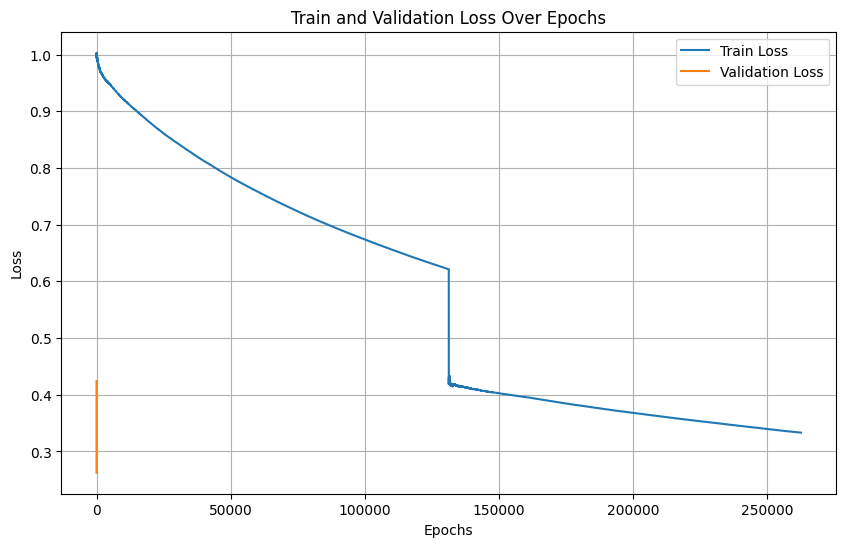

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

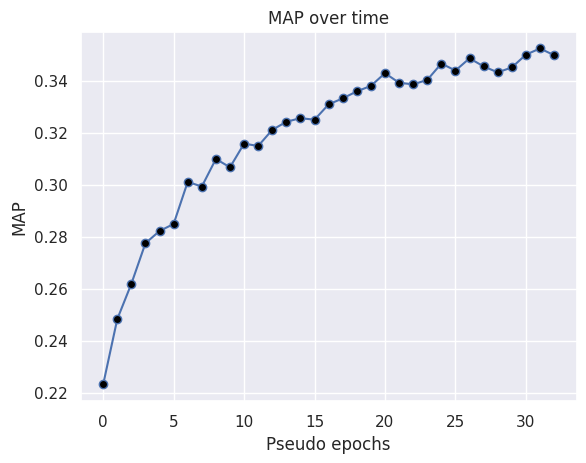

In [ ]:
maps = [0.2232, 0.2483, 0.2619, 0.2775, 0.2822, 0.2849, 0.3011, 0.2993, 0.3099, 0.3067, 0.3158, 0.3149, 0.3211, 0.3242, 0.3256, 0.325, 0.3309, 0.3332, 0.3359, 0.338, 0.3429, 0.3392, 0.3386, 0.3403, 0.3466, 0.3439, 0.3486, 0.3455, 0.3432, 0.3451, 0.35, 0.3524, 0.3498]
plt.xlabel("Pseudo epochs")
plt.ylabel("MAP")
plt.title("MAP over time")
plt.plot(maps, marker='o', markerfacecolor='black')
plt.show()

# Encoding inference queries

# **Encoding Inference Queries**

In [ ]:
inference_queries[i]

'falkland petroleum exploration'